In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import os
import random
from scipy.ndimage import zoom
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
register_matplotlib_converters()


import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.optimizers import *

In [0]:
# tf.compat.v1.enable_eager_execution()
# print("Eager execution: {}".format(tf.compat.v1.executing_eagerly()))
# ls 'drive/My Drive/10_Predictive/3_Project/003_NeuralNetSeq_FeatureImportance'

In [0]:
# data = ['date_time_snr_h03.xlsx',
#         '001_snr_h03.baa10.ce311.xq01.xlsx',
#         '002_snr_h03.baa10.ce312.xq01.xlsx',
#         '003_snr_h03.mey40.cs001.xq01.xlsx',
#         '006_snr_h03.pcb80.cf001.xq01.xlsx',
#         '007_1_snr_h03.pcb80.ct005.xq01.xlsx',
#         '007_2_snr_h03.pcb80.ct002.xq01.xlsx',
#         '008_1_snr_h03.mka81.ct001.xq01.xlsx',
#         '008_2_snr_h03.mka82.ct001.xq01.xlsx',
#         '009_1_snr_h03.mka81.ct002.xq01.xlsx',
#         '009_2_snr_h03.mka82.ct002.xq01.xlsx',
#         '010_1_snr_h03.mka81.ct003.xq01.xlsx',
#         '010_2_snr_h03.mka82.ct003.xq01.xlsx',
#         '011_1_snr_h03.mka81.ct004.xq01.xlsx',
#         '011_2_snr_h03.mka82.ct004.xq01.xlsx',
#         '012_1_snr_h03.mka81.ct005.xq01.xlsx',
#         '012_2_snr_h03.mka82.ct005.xq01.xlsx',
#         '013_1_snr_h03.mka81.ct006.xq01.xlsx',
#         '013_2_snr_h03.mka82.ct006.xq01.xlsx',
#         '014_1_snr_h03.mka81.ct007.xq01.xlsx',
#         '014_2_snr_h03.mka82.ct007.xq01.xlsx',
#         '015_1_snr_h03.mka81.ct008.xq01.xlsx',
#         '015_2_snr_h03.mka82.ct008.xq01.xlsx',
#         '016_1_snr_h03.mka81.ct009.xq01.xlsx',
#         '016_2_snr_h03.mka82.ct009.xq01.xlsx',
#         '017_1_snr_h03.mka81.ct010.xq01.xlsx',
#         '017_2_snr_h03.mka82.ct010.xq01.xlsx',
#         '018_1_snr_h03.mka81.ct011.xq01.xlsx',
#         '018_2_snr_h03.mka82.ct011.xq01.xlsx',
#         '019_1_snr_h03.mka81.ct012.xq01.xlsx',
#         '019_2_snr_h03.mka82.ct012.xq01.xlsx']
        

# datalabel = ['001_snr_h03.mka20.ct001.xq01.xlsx',
#         '002_snr_h03.mka20.ct002.xq01.xlsx',
#         '003_snr_h03.mka20.ct003.xq01.xlsx',
#         '004_snr_h03.mka20.ct004.xq01.xlsx',
#         '005_snr_h03.mka20.ct005.xq01.xlsx',
#         '006_snr_h03.mka20.ct006.xq01.xlsx',
#         '007_snr_h03.mka20.ct007.xq01.xlsx',
#         '008_snr_h03.mka20.ct008.xq01.xlsx',
#         '009_snr_h03.mka20.ct009.xq01.xlsx',
#         '010_snr_h03.mka20.ct010.xq01.xlsx',
#         '011_snr_h03.mka20.ct011.xq01.xlsx',
#         '012_snr_h03.mka20.ct012.xq01.xlsx',
#         '013_snr_h03.mka20.ct013.xq01.xlsx',
#         '014_snr_h03.mka20.ct014.xq01.xlsx',
#         '015_snr_h03.mka20.ct015.xq01.xlsx',
#         '016_snr_h03.mka20.ct016.xq01.xlsx',
#         '017_snr_h03.mka20.ct017.xq01.xlsx',
#         '018_snr_h03.mka20.ct018.xq01.xlsx',
#         '019_snr_h03.mka30.ct001.xq01.xlsx',
#         '020_snr_h03.mka30.ct002.xq01.xlsx',
#         '021_snr_h03.mka30.ct003.xq01.xlsx',
#         '022_snr_h03.mka30.ct004.xq01.xlsx',
#         '023_snr_h03.mka30.ct005.xq01.xlsx',
#         '024_snr_h03.mka30.ct006.xq01.xlsx',
#         '025_snr_h03.mka30.ct007.xq01.xlsx',
#         '026_snr_h03.mka30.ct008.xq01.xlsx',
#         '027_snr_h03.mka30.ct009.xq01.xlsx']

# df = pd.DataFrame()

# for txt in data:
#     read_df = pd.read_excel('drive/My Drive/10_Predictive/Pmd_for_Hydro_Plant/data/1_Generator_Stator/1_Input_gen/'+ txt)

#     read_df.index = read_df['id']
#     read_df.drop(('id'), axis=1, inplace=True)

#     if txt == 'date_time_snr_h03.xlsx':
#       print("input")
#     else:
#       indexNames = read_df[read_df['status'] == 'BAD'].index
#       read_df.drop(indexNames , inplace=True)
#       read_df.drop(('status'), axis=1, inplace=True)
#     df = pd.concat([df, read_df], axis=1, sort=False)

# for txt in datalabel:
#     read_df = pd.read_excel('drive/My Drive/10_Predictive/Pmd_for_Hydro_Plant/data/1_Generator_Stator/2_Output_kpi_gen/'+ txt)
#     read_df.index = read_df['id']
#     read_df.drop(('id'), axis=1, inplace=True)
#     indexNames = read_df[read_df['status'] == 'BAD'].index
#     read_df.drop(indexNames , inplace=True)
#     read_df.drop(('status'), axis=1, inplace=True)
#     df = pd.concat([df, read_df], axis=1, sort=False)
    
# df.dropna(inplace=True)
# df.columns = range(df.shape[1])

In [0]:
# from google.colab import files
# df.to_csv('df.csv')
# files.download('df.csv')

In [6]:
df = pd.read_excel('drive/My Drive/10_Predictive/Pmd_for_Hydro_Plant/code/Project3/df.xlsx')
print(df.shape)
df.head(1)

(141484, 58)


,datetime,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23,s24,s25,s26,s27,s28,s29,s30,l1,l2,l3,l4,l5,l6,l7,l8,l9,l10,l11,l12,l13,l14,l15,l16,l17,l18,l19,l20,l21,l22,l23,l24,l25,l26,l27
0,2019-04-15 03:41:52.013,0.0,0.0,0.0,0.9375,27.56288,25.73627,43.57265,35.51404,43.57265,35.40659,43.57265,35.51404,43.78754,35.51404,44.32478,35.40659,43.78754,35.51404,43.6801,35.40659,43.6801,35.40659,43.895,35.62149,44.10989,35.72894,43.895,35.29915,44.00244,35.83639,56.89622,56.89622,56.68132,57.43346,57.21856,56.46642,56.89622,56.78876,57.326,57.21856,56.57387,56.78876,57.5409,57.11111,57.326,57.11111,57.00366,57.64835,56.35897,57.00366,56.46642,56.57387,55.17705,56.14408,56.89622,57.00366,57.326


In [7]:
df.index = df['datetime']
df.index = df.index.astype('datetime64[ns]')
df['Day'] = df.index.dayofyear
df['year'] = df.index.year
df['Hour'] = df.index.hour
df.head(1)

,datetime,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23,s24,s25,s26,s27,s28,s29,s30,l1,l2,l3,l4,l5,l6,l7,l8,l9,l10,l11,l12,l13,l14,l15,l16,l17,l18,l19,l20,l21,l22,l23,l24,l25,l26,l27,Day,year,Hour
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-04-15 03:41:52.013,2019-04-15 03:41:52.013,0.0,0.0,0.0,0.9375,27.56288,25.73627,43.57265,35.51404,43.57265,35.40659,43.57265,35.51404,43.78754,35.51404,44.32478,35.40659,43.78754,35.51404,43.6801,35.40659,43.6801,35.40659,43.895,35.62149,44.10989,35.72894,43.895,35.29915,44.00244,35.83639,56.89622,56.89622,56.68132,57.43346,57.21856,56.46642,56.89622,56.78876,57.326,57.21856,56.57387,56.78876,57.5409,57.11111,57.326,57.11111,57.00366,57.64835,56.35897,57.00366,56.46642,56.57387,55.17705,56.14408,56.89622,57.00366,57.326,105,2019,3


In [8]:
df.isna().sum()/len(df)

datetime    0.0
s1          0.0
s2          0.0
s3          0.0
s4          0.0
           ... 
l26         0.0
l27         0.0
Day         0.0
year        0.0
Hour        0.0
Length: 61, dtype: float64

In [9]:
print(141484*0.8)
print(141484*0.2)

113187.20000000001
28296.800000000003


In [10]:
113187+14149+14148

141484

In [11]:
### TRAIN, VALIDATION, TEST TEMPORAL SPLIT ###

columns = ['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10',
           's11','s12','s13','s14','s15','s16','s17','s18','s19','s20',
           's21','s22','s23','s24','s25','s26','s27','s28','s29','s30']

y_train = df.iloc[:113187,:]['l14'].copy().values
train_date = df.iloc[:113187,:].datetime.values
x_train = df.iloc[:113187,:][columns].copy()

y_val = df.iloc[113187:127336,:]['l14'].copy().values
val_date = df.iloc[113187:127336,:].datetime.values
x_val = df.iloc[113187:127336,:][columns].copy()

y_test = df.iloc[127336:,:]['l14'].copy().values
test_date = df.iloc[127336:,:].datetime.values
x_test = df.iloc[127336:,:][columns].copy()

print(x_train.shape, x_val.shape, x_test.shape)

(113187, 30) (14149, 30) (14148, 30)


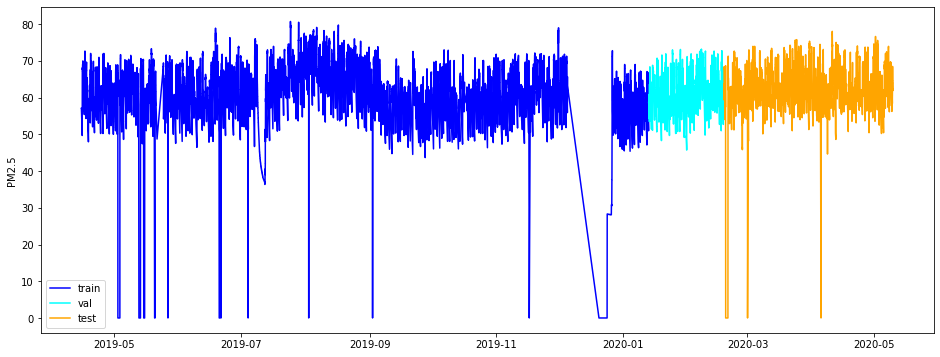

In [12]:
### PLOT TRAIN, VALIDATION, TEST ###

plt.figure(figsize=(16,6))

plt.plot(train_date, y_train, label='train', c='blue')
plt.plot(val_date, y_val, label='val', c='cyan')
plt.plot(test_date, y_test, label='test', c='orange')
plt.ylabel('PM2.5')
plt.legend()

In [0]:
### UTILITY FUNCTION FOR SEQUENCES GENERATION ###

sequence_length = 30

def gen_sequence(id_df, seq_length, seq_cols):

    data_matrix = id_df[seq_cols].values
    num_elements = data_matrix.shape[0]

    for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
        yield data_matrix[start:stop, :]

In [14]:
### GENERATE SEQUENCES ###

X_train, X_val, X_test = [], [], []

for sequence in gen_sequence(x_train, sequence_length, columns):
    X_train.append(sequence)
    
for sequence in gen_sequence(x_val, sequence_length, columns):
    X_val.append(sequence)
    
for sequence in gen_sequence(x_test, sequence_length, columns):
    X_test.append(sequence)
    
X_train, X_val, X_test = np.asarray(X_train), np.asarray(X_val), np.asarray(X_test)
print(X_train.shape, X_val.shape, X_test.shape)

(113157, 30, 30) (14119, 30, 30) (14118, 30, 30)


In [0]:
### UTILITY FUNCTIONS FOR TARGET SCALING ###

def scale_target(y, mean, std):
    return (y - mean)/std

def reverse_target(pred, mean, std): 
    return pred*std + mean

In [16]:
### SCALE TARGET ###

mean_train = y_train.mean()
std_train = y_train.std()

y_train_seq = scale_target(y_train[sequence_length:], mean_train, std_train)
y_val_seq = scale_target(y_val[sequence_length:], mean_train, std_train)
y_test_seq = scale_target(y_test[sequence_length:], mean_train, std_train)

print(y_train_seq.shape, y_val_seq.shape, y_test_seq.shape)

(113157,) (14119,) (14118,)


In [0]:
### SCALE SEQUENCES ###

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1,len(columns))).reshape(X_train.shape).astype('float32')
X_val = scaler.transform(X_val.reshape(-1,len(columns))).reshape(X_val.shape).astype('float32')
X_test = scaler.transform(X_test.reshape(-1,len(columns))).reshape(X_test.shape).astype('float32')

In [0]:
### DEFINE MODEL ###

def get_model():
    
    opt = Adam(lr=0.001)
    
    inp_seq = Input(shape=(sequence_length,len(columns)))
    
    x = Bidirectional(GRU(32, return_sequences=True))(inp_seq)
    x = AveragePooling1D(2)(x)
    x = Conv1D(32, 3, activation='relu', padding='same', 
               name='extractor')(x)
    x = Flatten()(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.5)(x)
    
    out = Dense(1)(x)
    
    model = Model(inp_seq, out)
    model.compile(optimizer=opt, loss='mse')
    
    return model

In [19]:
model = get_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 30, 30)]          0         
_________________________________________________________________
bidirectional (Bidirectional (None, 30, 64)            12288     
_________________________________________________________________
average_pooling1d (AveragePo (None, 15, 64)            0         
_________________________________________________________________
extractor (Conv1D)           (None, 15, 32)            6176      
_________________________________________________________________
flatten (Flatten)            (None, 480)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                7696      
_________________________________________________________________
dropout (Dropout)            (None, 16)                0     

In [20]:
tf.random.set_seed(33)
os.environ['PYTHONHASHSEED'] = str(33)
np.random.seed(33)
random.seed(33)

session_conf = tf.compat.v1.ConfigProto(
    intra_op_parallelism_threads=1, 
    inter_op_parallelism_threads=1
)
sess = tf.compat.v1.Session(
    graph=tf.compat.v1.get_default_graph(), 
    config=session_conf
)
tf.compat.v1.keras.backend.set_session(sess)


es = EarlyStopping(patience=5, verbose=1, min_delta=0.001, monitor='val_loss', mode='auto')
model = get_model()
model.fit([X_train], y_train_seq, epochs=100, batch_size=512, verbose=1, callbacks=[es], 
          validation_data=([X_val], y_val_seq))

Epoch 1/100
222/222 [==============================] - 5s 22ms/step - loss: 0.2014 - val_loss: 0.0129
Epoch 2/100
222/222 [==============================] - 4s 19ms/step - loss: 0.1514 - val_loss: 0.0111
Epoch 3/100
222/222 [==============================] - 4s 18ms/step - loss: 0.1428 - val_loss: 0.0108
Epoch 4/100
222/222 [==============================] - 4s 18ms/step - loss: 0.1384 - val_loss: 0.0135
Epoch 5/100
222/222 [==============================] - 4s 18ms/step - loss: 0.1399 - val_loss: 0.0087
Epoch 6/100
222/222 [==============================] - 4s 18ms/step - loss: 0.1350 - val_loss: 0.0092
Epoch 7/100
222/222 [==============================] - 4s 18ms/step - loss: 0.1341 - val_loss: 0.0168
Epoch 8/100
222/222 [==============================] - 4s 18ms/step - loss: 0.1366 - val_loss: 0.0076
Epoch 9/100
222/222 [==============================] - 4s 18ms/step - loss: 0.1264 - val_loss: 0.0088
Epoch 10/100
222/222 [==============================] - 4s 18ms/step - loss: 0.132

In [21]:
### MAKE PREDICTION ON TEST ###

pred = reverse_target(model.predict([X_test]).ravel(), mean_train, std_train)

print(mean_absolute_error(y_test[sequence_length:], pred))

1.8617158291179823


Text(0, 0.5, 'PM2.5')

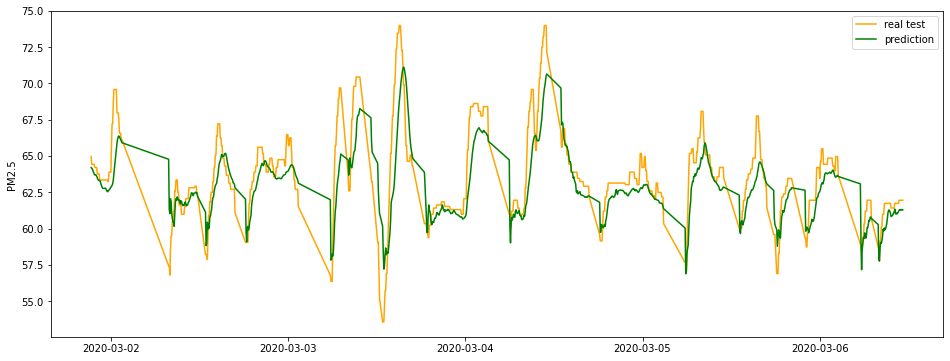

In [22]:
### PREDICTIONS vs REALITY ON TEST ###

plt.figure(figsize=(16,6))

start, end = 2100, 3000
plt.plot(test_date[sequence_length+start:end+sequence_length], y_test[sequence_length+start:end+sequence_length], c='orange', label='real test')
plt.plot(test_date[sequence_length+start:end+sequence_length], pred[start:end], c='green', label='prediction')
plt.legend(); plt.ylabel('PM2.5')

# INFERENCE ON PREDICTIONS

In [0]:
### UTILITY FUNCTIONS FOR GRADIENT IMPORTANCE AND ACTIVIATION MAPS GENERATION ### 


def gradient_importance(seq, model):

    seq = tf.Variable(seq[np.newaxis,:,:], dtype=tf.float32)

    with tf.GradientTape() as tape:
        predictions = model(seq)

    grads = tape.gradient(predictions, seq)
    grads = tf.reduce_mean(grads, axis=1).numpy()[0]
    
    return grads



def activation_grad(seq, model):
    
    seq = seq[np.newaxis,:,:]
    grad_model = Model([model.inputs], 
                       [model.get_layer('extractor').output, 
                        model.output])

    # Obtain the predicted value and the intermediate filters
    with tf.GradientTape() as tape:
        seq_outputs, predictions = grad_model(seq)

    # Extract filters and gradients
    output = seq_outputs[0]
    grads = tape.gradient(predictions, seq_outputs)[0]

    # Average gradients spatially
    weights = tf.reduce_mean(grads, axis=1)

    # Get a ponderated map of filters according to grad importance
    cam = np.ones(output.shape[0], dtype=np.float32)
    for index, w in enumerate(weights):
        cam += w * output[:, index]

    time = int(seq.shape[1]/output.shape[0])
    cam = zoom(cam.numpy(), time, order=1)
    heatmap = (cam - cam.min())/(cam.max() - cam.min())
    
    return heatmap

In [24]:
for x in range(0,X_test.shape[0],30):
  print(x)

0
30
60
90
120
150
180
210
240
270
300
330
360
390
420
450
480
510
540
570
600
630
660
690
720
750
780
810
840
870
900
930
960
990
1020
1050
1080
1110
1140
1170
1200
1230
1260
1290
1320
1350
1380
1410
1440
1470
1500
1530
1560
1590
1620
1650
1680
1710
1740
1770
1800
1830
1860
1890
1920
1950
1980
2010
2040
2070
2100
2130
2160
2190
2220
2250
2280
2310
2340
2370
2400
2430
2460
2490
2520
2550
2580
2610
2640
2670
2700
2730
2760
2790
2820
2850
2880
2910
2940
2970
3000
3030
3060
3090
3120
3150
3180
3210
3240
3270
3300
3330
3360
3390
3420
3450
3480
3510
3540
3570
3600
3630
3660
3690
3720
3750
3780
3810
3840
3870
3900
3930
3960
3990
4020
4050
4080
4110
4140
4170
4200
4230
4260
4290
4320
4350
4380
4410
4440
4470
4500
4530
4560
4590
4620
4650
4680
4710
4740
4770
4800
4830
4860
4890
4920
4950
4980
5010
5040
5070
5100
5130
5160
5190
5220
5250
5280
5310
5340
5370
5400
5430
5460
5490
5520
5550
5580
5610
5640
5670
5700
5730
5760
5790
5820
5850
5880
5910
5940
5970
6000
6030
6060
6090
6120
6150
6180
6210

In [0]:
ls 'drive/My Drive/10_Predictive/Pmd_for_Hydro_Plant/code/Project3/tmp'

In [0]:
### DISPLAY INPUT SEQUENCE ###
i = 0
for x in range(0,X_test.shape[0],1):
  # id_ = 150
  # plt.figure(figsize=(9,5))
  # plt.plot(X_test[x])
  # plt.ylabel('std series'); plt.xlabel('time lags'); plt.legend(columns)

  ## GRADIENTS IMPORTANCE ###
  grad_imp = gradient_importance(X_test[x], model)
  plt.figure(figsize=(7,5))
  plt.bar(range(len(grad_imp)), grad_imp)
  plt.xticks(range(len(columns)), columns, rotation=90)
  plt.ylabel('gradients'); plt.title(pd.to_datetime(test_date[sequence_length+x]))
  np.set_printoptions(False)
  plt.savefig("drive/My Drive/10_Predictive/Pmd_for_Hydro_Plant/code/Project3/tmp/"+'imp-'+str(i)+'.png')


  ### GENERATE ACTIVATION ON INPUT SEQUENCE ###
  activation = activation_grad(X_test[x], model)
  plt.figure(figsize=(9,5))
  plt.plot(X_test[x])
  plt.ylabel('std series'); plt.xlabel('time lags'); plt.title(pd.to_datetime(test_date[sequence_length+x]))
  plt.twinx()
  plt.imshow(np.vstack([activation]*30), alpha=0.35)
  plt.axis('off'); plt.colorbar()
  np.set_printoptions(False)
  plt.savefig("drive/My Drive/10_Predictive/Pmd_for_Hydro_Plant/code/Project3/tmp/"+'act-'+str(i)+'.png')
  i+=1

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly

In [0]:
! ffmpeg -r 3 -i /content/tmp/act-%d.png -vcodec mpeg4 -y /content/gan_morph1.mp4